# Evolução da Covid-19 de acordo com a semana epidemiológica

Dados extraídos de Brasil.io (https://brasil.io/home/)

In [3]:
import pandas as pd
import numpy as np

## Baixa os dados

In [102]:
# import requests

# url = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"

# r = requests.get(url)
# with open('covid.csv.gz', 'wb') as outfile:
#     outfile.write(r.content)

## Extrai o arquivo

In [108]:
import gzip

with gzip.open('covid.csv.gz') as f:

    df = pd.read_csv(f)

In [109]:
df

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0000,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0000,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0000,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0000,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0000,0,3,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268630,NaN,43.0,2020-06-26,26,11377239.0,True,False,24114,211.94949,2020-06-26,0.0224,540,109,state,RS,1054,40
268631,NaN,42.0,2020-06-26,26,7164788.0,True,False,22947,320.27465,2020-06-26,0.0130,298,107,state,SC,996,9
268632,NaN,28.0,2020-06-26,26,2298696.0,True,False,21908,953.06208,2020-06-26,0.0264,579,105,state,SE,827,25
268633,NaN,35.0,2020-06-26,26,45919049.0,True,False,258508,562.96462,2020-06-26,0.0540,13966,123,state,SP,9921,207


In [110]:
df.describe()

,city_ibge_code,epidemiological_week,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,2.671070e+05,268635.000000,2.671070e+05,268635.000000,260716.000000,268635.000000,268635.000000,268635.000000,268635.000000,268635.000000
mean,3.122629e+06,21.748045,1.525066e+05,237.698319,167.353190,0.056690,12.680354,32.739736,9.384388,0.414213
std,1.027927e+06,3.223805,1.336533e+06,3026.817695,369.883007,0.154258,197.442060,22.505864,116.871550,5.854432
min,1.100000e+01,9.000000,8.370000e+02,0.000000,0.002180,0.000000,0.000000,1.000000,-4289.000000,-131.000000
25%,2.407807e+06,20.000000,8.526000e+03,2.000000,15.111165,0.000000,0.000000,14.000000,0.000000,0.000000
50%,3.131703e+06,22.000000,1.869900e+04,7.000000,47.406850,0.000000,0.000000,29.000000,0.000000,0.000000
75%,4.103909e+06,24.000000,4.265900e+04,35.000000,157.467575,0.045200,1.000000,48.000000,1.000000,0.000000
max,5.300108e+06,26.000000,4.591905e+07,258508.000000,14148.174240,1.000000,13966.000000,123.000000,19030.000000,434.000000


## Dataframe só com estados

In [111]:
estados = df[df["place_type"] == 'state']

In [112]:
estados

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0000,0,1,state,SP,1,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0000,0,2,state,SP,0,0
5,NaN,35.0,2020-02-27,9,45919049.0,False,False,1,0.00218,2020-02-27,0.0000,0,3,state,SP,0,0
7,NaN,35.0,2020-02-28,9,45919049.0,False,False,2,0.00436,2020-02-28,0.0000,0,4,state,SP,1,0
9,NaN,35.0,2020-02-29,9,45919049.0,False,False,2,0.00436,2020-02-29,0.0000,0,5,state,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268630,NaN,43.0,2020-06-26,26,11377239.0,True,False,24114,211.94949,2020-06-26,0.0224,540,109,state,RS,1054,40
268631,NaN,42.0,2020-06-26,26,7164788.0,True,False,22947,320.27465,2020-06-26,0.0130,298,107,state,SC,996,9
268632,NaN,28.0,2020-06-26,26,2298696.0,True,False,21908,953.06208,2020-06-26,0.0264,579,105,state,SE,827,25
268633,NaN,35.0,2020-06-26,26,45919049.0,True,False,258508,562.96462,2020-06-26,0.0540,13966,123,state,SP,9921,207


## Total de mortes até o momento

In [113]:
estados["new_deaths"].sum()

56057

## Mortes por semana epidemiológica

In [119]:
estados['day_of_week'] = pd.to_datetime(estados['date']).dt.day_name()

<ipython-input-119-5ec924b28865>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estados['day_of_week'] = pd.to_datetime(estados['date']).dt.day_name()


In [120]:
estados

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,day_of_week
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0000,0,1,state,SP,1,0,Tuesday
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0000,0,2,state,SP,0,0,Wednesday
5,NaN,35.0,2020-02-27,9,45919049.0,False,False,1,0.00218,2020-02-27,0.0000,0,3,state,SP,0,0,Thursday
7,NaN,35.0,2020-02-28,9,45919049.0,False,False,2,0.00436,2020-02-28,0.0000,0,4,state,SP,1,0,Friday
9,NaN,35.0,2020-02-29,9,45919049.0,False,False,2,0.00436,2020-02-29,0.0000,0,5,state,SP,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268630,NaN,43.0,2020-06-26,26,11377239.0,True,False,24114,211.94949,2020-06-26,0.0224,540,109,state,RS,1054,40,Friday
268631,NaN,42.0,2020-06-26,26,7164788.0,True,False,22947,320.27465,2020-06-26,0.0130,298,107,state,SC,996,9,Friday
268632,NaN,28.0,2020-06-26,26,2298696.0,True,False,21908,953.06208,2020-06-26,0.0264,579,105,state,SE,827,25,Friday
268633,NaN,35.0,2020-06-26,26,45919049.0,True,False,258508,562.96462,2020-06-26,0.0540,13966,123,state,SP,9921,207,Friday


In [121]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

dia = estados.groupby("day_of_week").sum().reindex(cats)

In [122]:
dia

,city_ibge_code,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
day_of_week,,,,,,,,,,,,
Sunday,11863.0,7662,3.270472e+09,0.0,17.0,4183620,72751.03199,14.2971,226021,21183,106702,4620
Monday,11886.0,7674,3.279604e+09,0.0,8.0,4316854,75840.00400,14.7972,232010,21587,133234,5989
Tuesday,11976.0,7706,3.337782e+09,0.0,9.0,4520538,79710.75661,14.8217,241961,21994,203684,9951
Wednesday,12008.0,7730,3.347958e+09,0.0,8.0,4729560,83561.13291,14.8388,251112,22403,209022,9151
Thursday,12305.0,7828,3.415214e+09,5.0,7.0,4944563,87623.88383,15.0671,261292,22821,215003,10180
Friday,12446.0,7897,3.447414e+09,22.0,10.0,5190287,91703.28442,15.0965,270413,23245,245724,9121
Saturday,11805.0,7239,3.245966e+09,0.0,18.0,4076918,70641.13014,14.2803,221401,20780,165947,7045


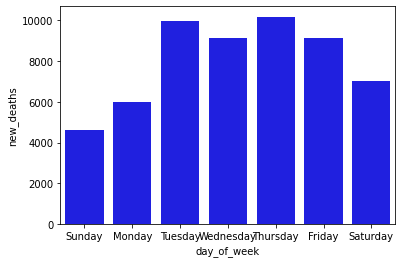

In [123]:
ax = sns.barplot(x=dia.index, y="new_deaths", data=dia, ci=None, color="blue")

## Evolução de mortes por semana epidemiológica

In [114]:
semana = estados.groupby("epidemiological_week", as_index=False).sum()

In [115]:
semana

,epidemiological_week,city_ibge_code,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
0,9,175.0,2.295952e+08,0.0,0.0,7,0.01526,0.0000,0,15,2,0
1,10,551.0,4.180455e+08,0.0,1.0,50,0.23969,0.0000,0,79,17,0
2,11,2629.0,9.655304e+08,0.0,14.0,443,3.13606,0.0000,0,399,117,0
3,12,4692.0,1.346966e+09,0.0,19.0,3980,41.28499,0.1825,40,1230,996,18
4,13,5502.0,1.471030e+09,0.0,7.0,18782,207.32154,1.1806,450,2485,2821,97
5,14,5502.0,1.471030e+09,0.0,4.0,49409,514.38797,5.6037,1864,3808,6428,330
6,15,5502.0,1.471030e+09,0.0,3.0,113123,1180.00902,8.8959,5755,5131,10610,696
7,16,5502.0,1.471030e+09,0.0,2.0,203779,2363.63271,9.4900,12414,6454,16184,1234
8,17,5502.0,1.471030e+09,0.0,1.0,334104,4150.80237,9.5019,21946,7777,22331,1699
9,18,5502.0,1.471030e+09,0.0,3.0,561039,7342.85173,9.0293,38759,9100,37924,2734


In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

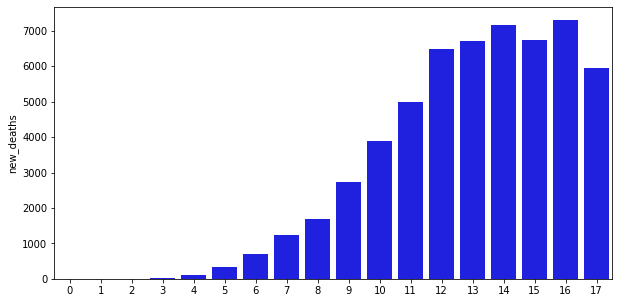

In [149]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=semana.index, y="new_deaths", data=semana, ci=None, color="blue")

## Mortes por dia da semana

In [124]:
domingo = estados["day_of_week"] == "Sunday"
segunda = estados["day_of_week"] == "Monday"
terca = estados["day_of_week"] == "Tuesday"
quarta = estados["day_of_week"] == "Wednesday"
quinta = estados["day_of_week"] == "Thursday"
sexta = estados["day_of_week"] == "Friday"
sabado = estados["day_of_week"] == "Saturday"

In [139]:
sunday = estados[domingo].groupby("epidemiological_week", as_index=False).sum()
monday = estados[segunda].groupby("epidemiological_week", as_index=False).sum()
tuesday = estados[terca].groupby("epidemiological_week", as_index=False).sum()
wednesday = estados[quarta].groupby("epidemiological_week", as_index=False).sum()
thursday = estados[quinta].groupby("epidemiological_week", as_index=False).sum()
friday = estados[sexta].groupby("epidemiological_week", as_index=False).sum()
saturday = estados[sabado].groupby("epidemiological_week", as_index=False).sum()

In [136]:
sunday

,epidemiological_week,city_ibge_code,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
0,10,35.0,45919049.0,0.0,0.0,2,0.00436,0.0000,0,6,0,0
1,11,240.0,109597122.0,0.0,1.0,25,0.15839,0.0000,0,28,6,0
2,12,584.0,172895790.0,0.0,8.0,155,1.45810,0.0000,0,114,19,0
3,13,786.0,210147125.0,0.0,1.0,1594,16.81513,0.0510,25,274,462,7
4,14,786.0,210147125.0,0.0,4.0,4303,49.80648,0.3932,137,463,350,22
5,15,786.0,210147125.0,0.0,1.0,11421,116.94781,1.1127,496,652,1040,51
6,16,786.0,210147125.0,0.0,1.0,22456,248.17644,1.3265,1237,841,1465,96
7,17,786.0,210147125.0,0.0,0.0,39105,470.98048,1.3622,2491,1030,1930,116
8,18,786.0,210147125.0,0.0,0.0,63221,818.34929,1.3130,4301,1219,3715,227
9,19,786.0,210147125.0,0.0,0.0,101816,1412.51649,1.2599,7073,1408,4386,265


### Novas mortes em cada dia da semana

Domingo

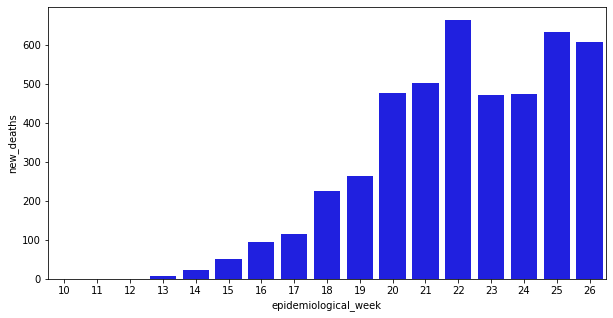

In [138]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="epidemiological_week", y="new_deaths", data=sunday, ci=None, color="blue")

Segunda-feira

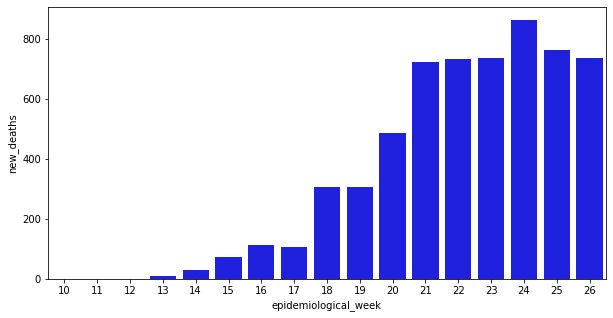

In [140]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="epidemiological_week", y="new_deaths", data=monday, ci=None, color="blue")

Terça-feira

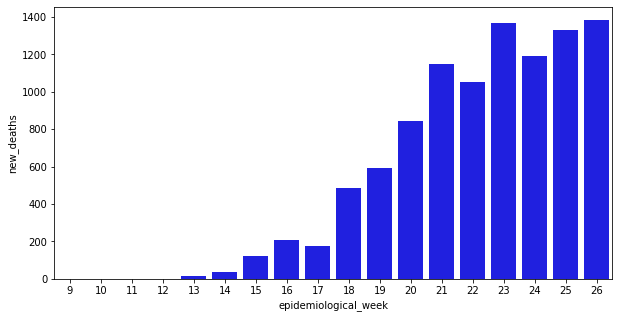

In [141]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="epidemiological_week", y="new_deaths", data=tuesday, ci=None, color="blue")

Quarta-feira

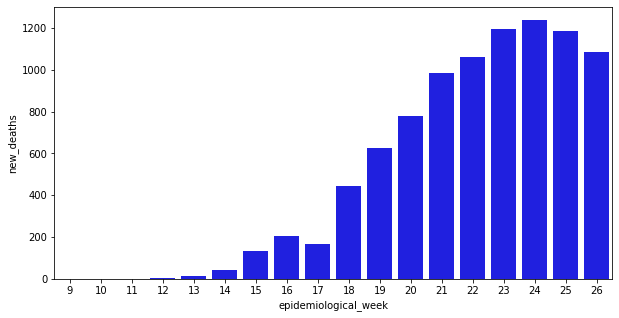

In [142]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="epidemiological_week", y="new_deaths", data=wednesday, ci=None, color="blue")

Quinta-feira

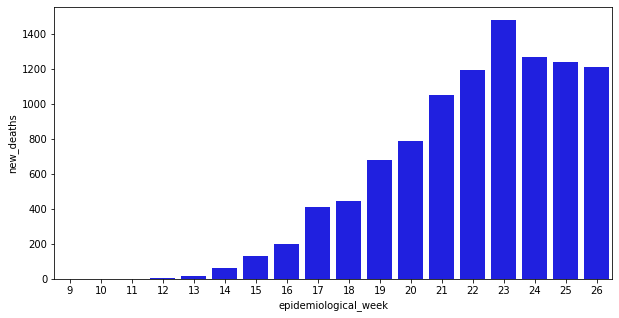

In [143]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="epidemiological_week", y="new_deaths", data=thursday, ci=None, color="blue")

Sexta-feira

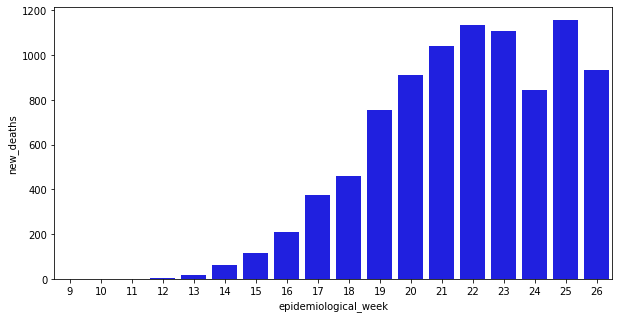

In [144]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="epidemiological_week", y="new_deaths", data=friday, ci=None, color="blue")

Sábado

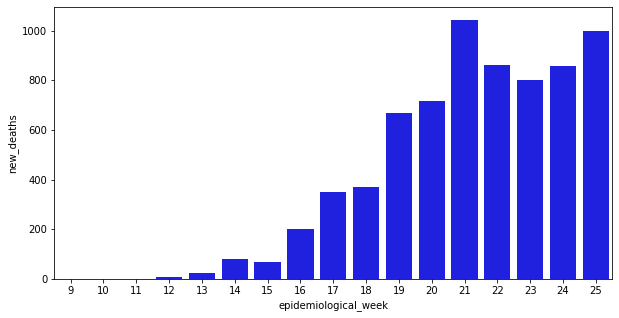

In [148]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="epidemiological_week", y="new_deaths", data=saturday, ci=None, color="blue")